##Q1: The starter code is missing some comments and explanations. Write the required comments to show that you fully understand the exercise we did in the class

In [1]:

# starter code for computational imaging - coding assignment 1

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fft import fft, ifft, fftshift, fftfreq, ifftshift
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline

# Preliminaries.

In this assignment we work with a variation of a Cosine function as our signal. The frequency of
$Cos(2π x)$ is $1$, meaning one cycle occurs per unit distance (or space) of $x$. Similarly the frequency of $Cos(2π u_0 x)$ is $u_0$, i.e. *u* cycles occurs per unit distance. You can experiment with different values for $u_0$ below.

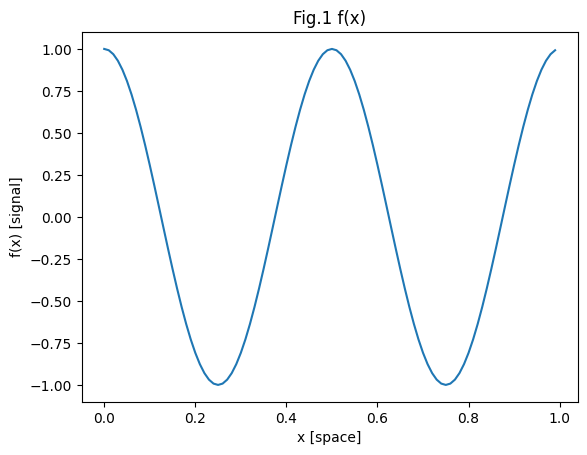

In [ ]:
# Cosine function and it's frequency
dx    = .01                      # sampling period
u0    = 2                       # frequency of the signal
x     = np.arange(0,1,dx)
fx    = np.cos(2*np.pi* u0 *x)

plt.plot(x,fx)
plt.title("Fig.1 f(x)")
plt.xlabel("x [space]")
plt.ylabel("f(x) [signal]")
plt.show()

# Q1: Starter code

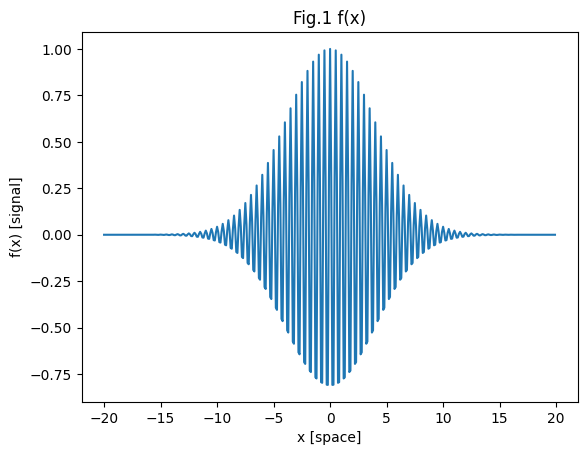

In [ ]:
# section 1: Define and plot a modulated cosine signal (Gaussian-modulated cosine)

dx  = .1                                                   # Sampling period (step size for x values)
u0  = 2                                                    # Frequency of the cosine wave in Hz
x   = np.arange(-20, 20, dx)                               # Generate x values from -20 to 20 with spacing dx
fx  = np.exp(-0.01 * np.pi * x**2) * np.cos(2*np.pi*u0*x)  # Create a Gaussian-modulated cosine signal

plt.plot(x, fx)
plt.title("Fig.1 f(x)")
plt.xlabel("x [space]")
plt.ylabel("f(x) [signal]")
plt.show()


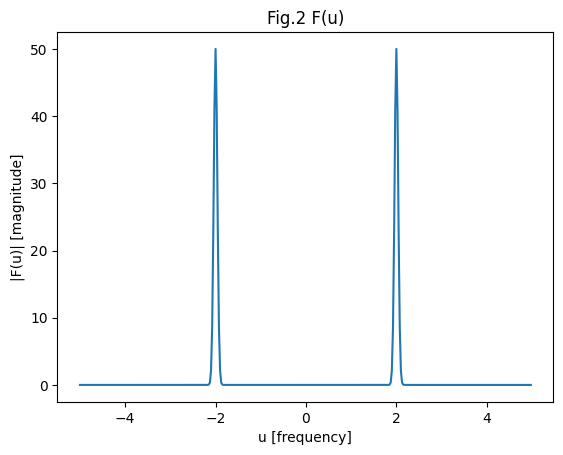

In [ ]:
# section 2: Compute and plot the Fourier Transform of the signal f(x)

u       = fftshift(fftfreq(len(x), dx))      # Generate frequency axis (u) and shift zero frequency to center
Fu      = fftshift(fft(fx))                  # Compute the FFT of the signal and shift zero frequency to center

plt.plot(u, np.abs(Fu))                      # Plot the magnitude spectrum of the Fourier Transform
plt.title("Fig.2 F(u)")
plt.xlabel("u [frequency]")                  # Label for frequency axis
plt.ylabel("|F(u)| [magnitude]")             # Label for magnitude of Fourier Transform

plt.show()


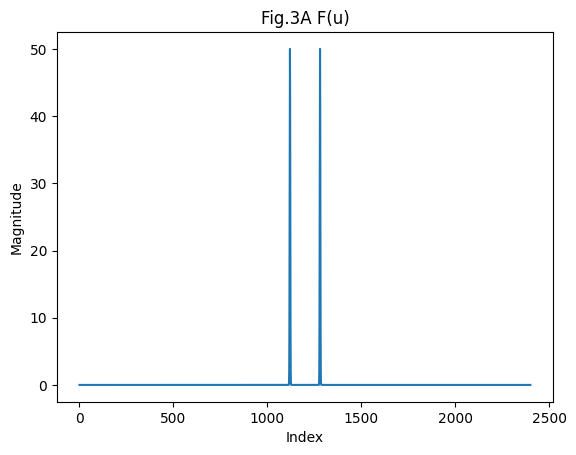

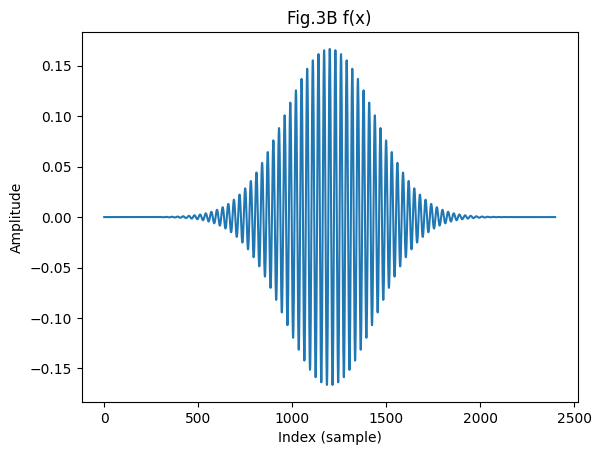

In [ ]:
# section 3: Zero-padding in frequency domain and inverse transform to observe its effect on time-domain signal

Fu_pad = np.pad(Fu, pad_width=1000)                     # Pad the Fourier Transform with zeros on both sides to increase time-domain resolution

plt.plot(np.abs(Fu_pad))                                # Plot the magnitude of the zero-padded Fourier Transform
plt.title("Fig.3A F(u)")
plt.xlabel("Index")                                     # Label x-axis as the index (since u is not recomputed after padding)
plt.ylabel("Magnitude")                                 # Label y-axis as the magnitude
plt.show()

fx_rec = ifft(ifftshift(Fu_pad))                        # Apply inverse FFT (after unshifting) to get back time-domain signal from zero-padded spectrum
plt.title("Fig.3B f(x)")
plt.plot(fx_rec.real)                                   # Plot the real part of the reconstructed signal
plt.xlabel("Index (sample)")                            # Label x-axis as index since original x is no longer valid
plt.ylabel("Amplitude")                                 # Label y-axis as the signal amplitude
plt.show()


## Q2: Augment the starter code to demonstrate (1) an over-sampling case, (2) a critically sampling case, (3) an under-sampling case and plot the equivalent figure 3B for each case.

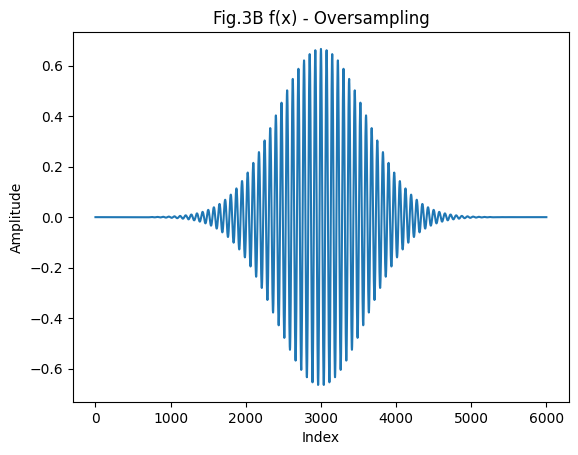

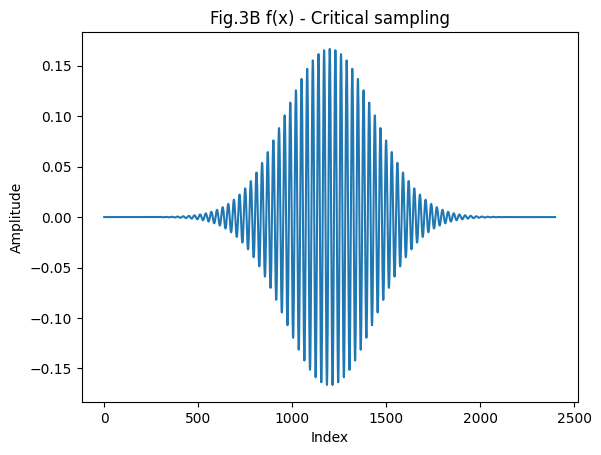

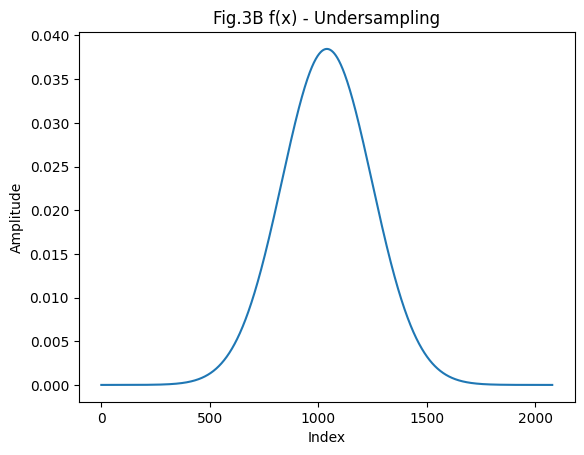

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift, fftfreq, ifft, ifftshift

u0 = 2  # base frequency of the cosine wave

# Loop through different sampling intervals to simulate over-, critical-, and under-sampling
for dx, label in zip([0.01, 0.1, 0.5], ['Oversampling', 'Critical sampling', 'Undersampling']):

    x = np.arange(-20, 20, dx)                                      # Define spatial domain with sampling interval dx
    fx = np.exp(-0.01 * np.pi * x**2) * np.cos(2*np.pi*u0*x)        # Define the Gaussian-modulated cosine signal f(x)

    Fu = fftshift(fft(fx))                                          # Compute the FFT and shift it to center the zero frequency
    Fu_pad = np.pad(Fu, pad_width=1000)                             # Apply zero-padding in frequency domain to improve resolution
    fx_rec = ifft(ifftshift(Fu_pad))                                # Perform inverse FFT after unshifting to reconstruct f(x)

    # Plot the reconstructed signal in time/space domain
    plt.figure()
    plt.plot(fx_rec.real)                                           # Plot the real part (imaginary is due to numerical errors)
    plt.title(f"Fig.3B f(x) - {label}")                             # Indicate the sampling type in the title
    plt.xlabel("Index")                                             # x-axis represents index, not actual x since padding changes resolution
    plt.ylabel("Amplitude")                                         # y-axis is signal amplitude
    plt.show()


## Q3: Now extend the function f(x) to an equivalent two-dimensional function f(x, y). Repeat Q2 for the two-dimensional case and plot equivalent figure 3B for each case.

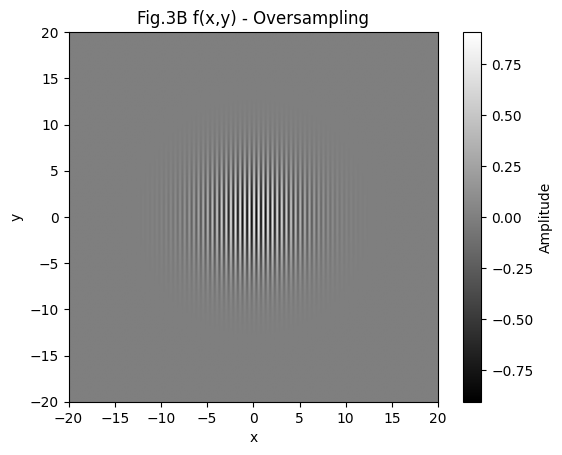

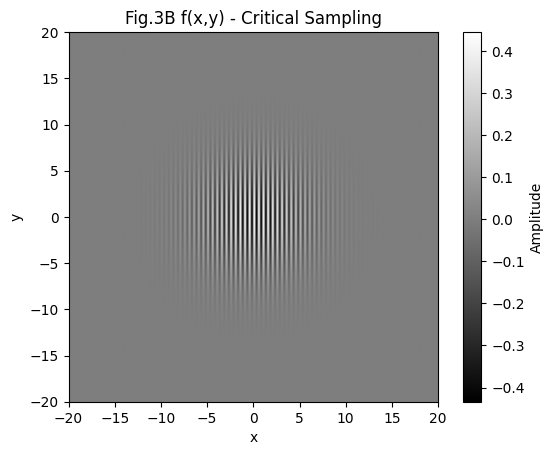

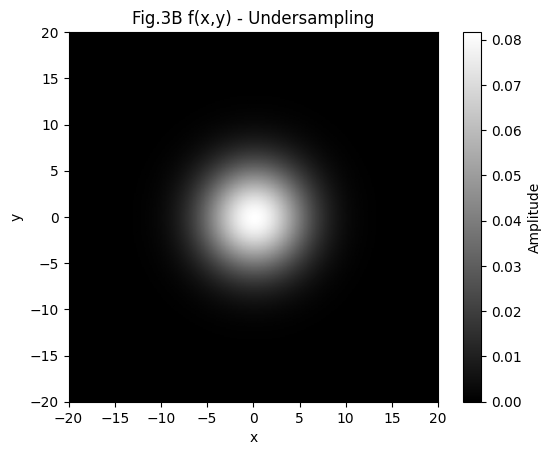

In [ ]:
# Q3: Extend f(x) to a 2D signal f(x,y) and repeat Q2 in 2D

from scipy.fft import fft2, ifft2

u0 = 2  # Base frequency of the cosine wave along the x-direction

# Loop through different sampling intervals to simulate over-, critical-, and under-sampling
for dx, label in zip([0.01, 0.1, 0.5], ['Oversampling', 'Critical Sampling', 'Undersampling']):

    x = np.arange(-20, 20, dx)                    # Define 1D x-axis based on sampling rate
    y = np.arange(-20, 20, dx)                    # Define 1D y-axis similarly
    X, Y = np.meshgrid(x, y)                      # Create 2D spatial grid using meshgrid

    # Define 2D signal f(x,y): Gaussian envelope multiplied by cosine wave along x
    fxy = np.exp(-0.01 * np.pi * (X**2 + Y**2)) * np.cos(2 * np.pi * u0 * X)

    Fuv = fftshift(fft2(fxy))                     # Compute 2D FFT and shift zero frequency to center
    Fuv_pad = np.pad(Fuv, ((100, 100), (100, 100)), mode='constant')  # Zero-pad in both dimensions to improve spatial resolution

    fxy_rec = ifft2(ifftshift(Fuv_pad))           # Inverse 2D FFT (after unshifting) to recover high-res spatial signal

    # Plot reconstructed 2D signal
    plt.figure()
    plt.imshow(np.real(fxy_rec), cmap='gray', extent=[-20, 20, -20, 20])  # Display real part as grayscale image
    plt.title(f"Fig.3B f(x,y) - {label}")         # Title indicating sampling type
    plt.xlabel("x")                               # x-axis label
    plt.ylabel("y")                               # y-axis label
    plt.colorbar(label="Amplitude")               # Add colorbar to indicate amplitude levels
    plt.show()


## Thank you for the opportunity.